### Client-Focused Research Questions, Hypotheses, and Indicators (Jennifer Montgomery)

Hypothesis 3:

 Renovated Houses with Higher Grades Sell for Significantly Higher Prices than Unrenovated Ones

Statement: Renovated homes with higher grades (9 or above) tend to have a higher market value compared to their unrenovated counterparts in the same area.

Why It Matters: Jennifer is looking for resale-ready homes that are already renovated. This will test whether renovated homes truly command a premium price in the market, which is important for her investment strategy.

Testing Methods:

1. Grouped Bar Chart of Sale Prices: A visual comparison between renovated and unrenovated homes to observe the price difference.

2. T-test or ANOVA: Perform statistical tests to determine if there's a significant difference in mean sale prices between renovated and unrenovated homes.

3. Regression Model with Renovation as a Feature: Build a regression model where renovation status is one of the key variables to see how much renovation influences the sale price, adjusting for other factors like size, location, etc.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

# Step 1: Categorize grade
def grade_category(grade):
    if grade >= 9:
        return 'High (9+)'
    elif grade >= 7:
        return 'Mid (7-8)'
    else:
        return 'Low (1-6)'

df_houses['grade_category'] = df_houses['grade'].apply(grade_category)

# Step 2: Combine categories into one column for easier plotting
df_houses['combined_category'] = (
    df_houses['renovated'] + ' | ' +
    df_houses['grade_category'] + ' | ' +
    df_houses['waterfront'].map({1: 'Waterfront', 0: 'Non-Waterfront'})
)

# Step 3: Group by combined category and calculate mean price
grouped_combined = df_houses.groupby('combined_category')['price'].mean().reset_index()

# Step 4: Plot
plt.figure(figsize=(14, 7))
sns.barplot(data=grouped_combined, x='combined_category', y='price')
plt.title('Average House Prices by Renovation, Grade, and Waterfront Status', fontsize=14)
plt.xlabel('Category Combination', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df_houses' is not defined

/tmp/ipykernel_673945/3513317161.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=grouped, x='grade_category', y='price', hue='renovated', palette='Set2', ci=None)


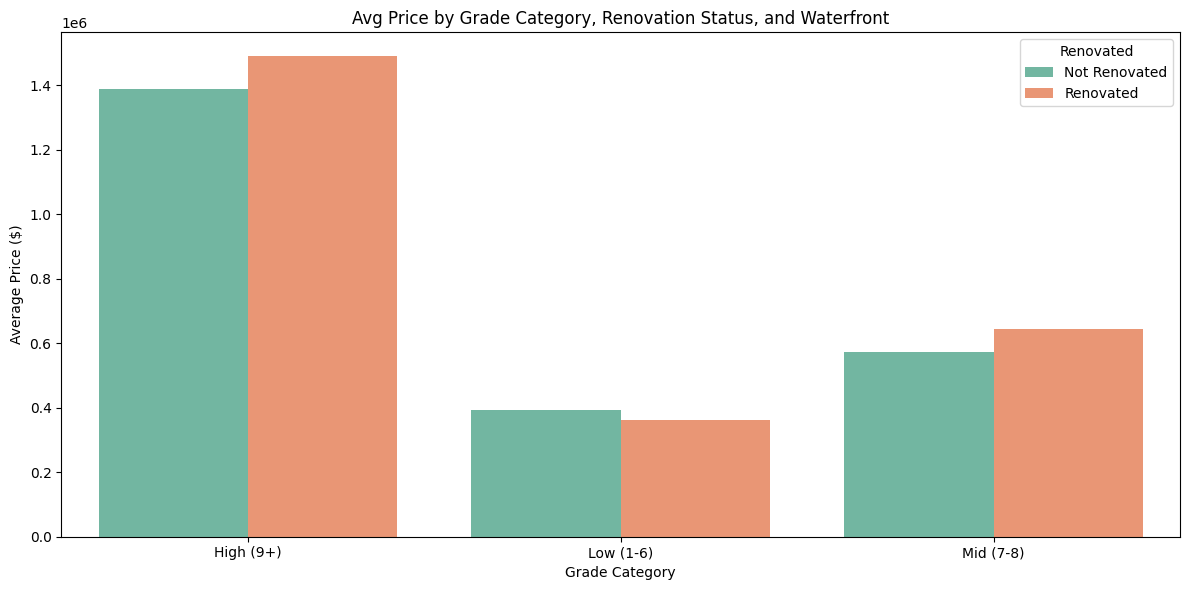

In [ ]:
# Create grade category
df_houses['grade_category'] = df_houses['grade'].apply(
    lambda g: 'High (9+)' if g >= 9 else 'Mid (7-8)' if g >= 7 else 'Low (1-6)'
)

# Group and calculate mean price
grouped = df_houses.groupby(['renovated', 'grade_category', 'waterfront'])['price'].mean().reset_index()

# Convert waterfront to label
grouped['waterfront'] = grouped['waterfront'].map({0: 'Non-Waterfront', 1: 'Waterfront'})

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='grade_category', y='price', hue='renovated', palette='Set2', ci=None)
plt.title('Avg Price by Grade Category, Renovation Status, and Waterfront')
plt.xlabel('Grade Category')
plt.ylabel('Average Price ($)')
plt.legend(title='Renovated')
plt.tight_layout()
plt.show()


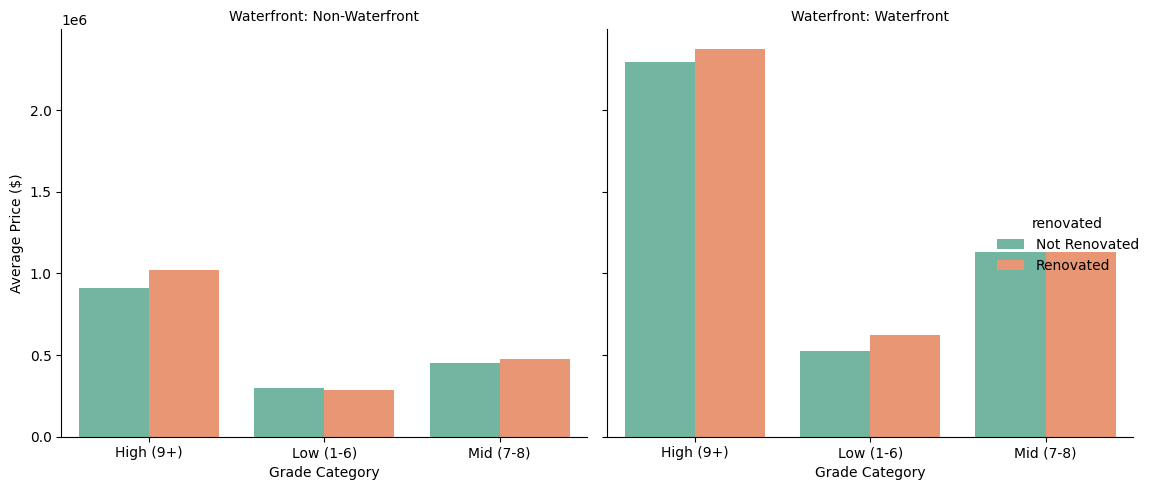

In [ ]:
# Faceted barplot by waterfront
g = sns.catplot(
    data=grouped, kind='bar',
    x='grade_category', y='price', hue='renovated',
    col='waterfront', palette='Set2', height=5, aspect=1
)
g.set_titles("Waterfront: {col_name}")
g.set_axis_labels("Grade Category", "Average Price ($)")
plt.tight_layout()
plt.show()
